# setup

In [1]:
%load_ext autoreload
%autoreload 2

from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from utils.visualization import show_confusion_matrix


# sklearn example 1

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
print(model.classes_)
print(model.intercept_)
print(model.coef_)
model.predict_proba(x)


[0 1]
[-1.04608067]
[[0.51491375]]


array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [3]:
model.predict(x)


array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [4]:
model.score(x, y)


0.9

In [5]:
cm = confusion_matrix(y, model.predict(x))
cm


array([[3, 1],
       [0, 6]])

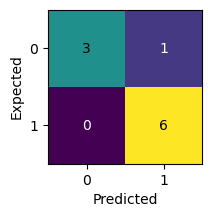

In [6]:
show_confusion_matrix(y, model.predict(x))

In [7]:
print(classification_report(y, model.predict(x)))


              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [8]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(x, y)
print(model.intercept_)
print(model.coef_)
print(model.predict_proba(x))
print(model.predict(x))
print(model.score(x, y))
print(model.predict(x))

[-3.51335372]
[[1.12066084]]
[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]
[0 0 0 0 1 1 1 1 1 1]
1.0
[0 0 0 0 1 1 1 1 1 1]


In [9]:
cm = confusion_matrix(y, model.predict(x))
print(cm)
print(classification_report(y, model.predict(x)))


[[4 0]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# sklearn example 2


In [10]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

model = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(x, y)

p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
cm = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)


In [11]:
print('x:', x, sep='\n')
print('y:', y, sep='\n', end='\n\n')
print('intercept:', model.intercept_)
print('coef:', model.coef_, end='\n\n')
print('p_pred:', p_pred, sep='\n', end='\n\n')
print('y_pred:', y_pred, end='\n\n')
print('score_:', score_, end='\n\n')
print('conf_m:', cm, sep='\n', end='\n\n')
print('report:', report, sep='\n')


x:
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
y:
[0 1 0 0 1 1 1 1 1 1]

intercept: [-1.51632619]
coef: [[0.703457]]

p_pred:
[[0.81999686 0.18000314]
 [0.69272057 0.30727943]
 [0.52732579 0.47267421]
 [0.35570732 0.64429268]
 [0.21458576 0.78541424]
 [0.11910229 0.88089771]
 [0.06271329 0.93728671]
 [0.03205032 0.96794968]
 [0.0161218  0.9838782 ]
 [0.00804372 0.99195628]]

y_pred: [0 0 0 1 1 1 1 1 1 1]

score_: 0.8

conf_m:
[[2 1]
 [1 6]]

report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



# StatsModels example


In [12]:
import statsmodels.api as sm

x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
x = sm.add_constant(x)

model = sm.Logit(y, x).fit(method='newton')
print(model.params)
print((model.predict(x) >= 0.5).astype(int))
model.predict(x)


Optimization terminated successfully.
         Current function value: 0.350471
         Iterations 7
[-1.972805    0.82240094]
[0 0 0 1 1 1 1 1 1 1]


array([0.12208792, 0.24041529, 0.41872657, 0.62114189, 0.78864861,
       0.89465521, 0.95080891, 0.97777369, 0.99011108, 0.99563083])

In [13]:
print(model.pred_table())
print(model.summary())
print(model.summary2())


[[2. 1.]
 [1. 6.]]
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Mon, 09 Jan 2023   Pseudo R-squ.:                  0.4263
Time:                        14:32:14   Log-Likelihood:                -3.5047
converged:                       True   LL-Null:                       -6.1086
Covariance Type:            nonrobust   LLR p-value:                   0.02248
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9728      1.737     -1.136      0.256      -5.377       1.431
x1             0.8224      0.528      1.557      0.119      -0.213       1.858
                        Results: 

# Logistic Regression in Python: Handwriting Recognition


0.964509394572025
0.9416666666666667


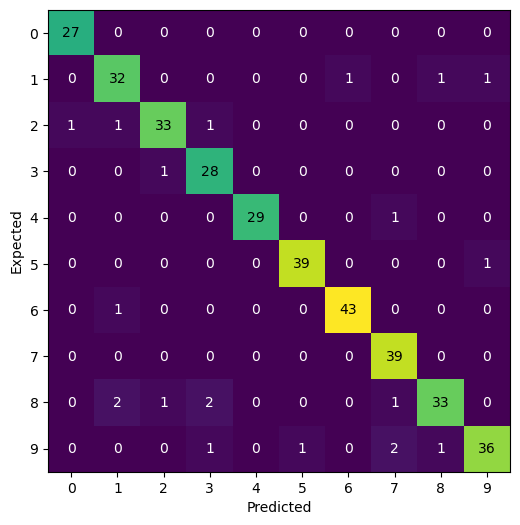

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x, y = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0).fit(x_train, y_train)
y_pred = model.predict(x_test)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
confusion_matrix(y_test, y_pred)
show_confusion_matrix(y_test, y_pred)


In [15]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

